In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#11.2에서 저장한 apple_data파일 불러오기
df=pd.read_csv('/content/apple_data.csv')
model=ARIMA(df['Close'].values,order=(0,1,2))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   13
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -45.967
Method:                       css-mle   S.D. of innovations              7.634
Date:                Fri, 24 Feb 2023   AIC                             99.934
Time:                        17:27:56   BIC                            102.194
Sample:                             1   HQIC                            99.470
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8887      0.757     -2.496      0.013      -3.372      -0.406
ma.L1.D.y     -0.4047      0.292     -1.387      0.165      -0.976       0.167
ma.L2.D.y     -0.5953      0.240     -2.477      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


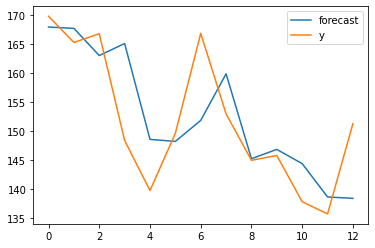

In [14]:
fig=model_fit.plot_predict()

In [39]:
forecast_data=model_fit.forecast(steps=5)
forecast_data

(array([145.965245  , 136.42198279, 134.53326575, 132.64454871,
        130.75583167]),
 array([7.6338443 , 8.88415336, 8.88415336, 8.88415336, 8.88415336]),
 array([[131.0031851 , 160.9273049 ],
        [119.00936217, 153.83460341],
        [117.12064513, 151.94588637],
        [115.23192809, 150.05716932],
        [113.34321105, 148.16845228]]))

In [40]:
predict_y = forecast_data[0].tolist()
# 마지막 예측 데이터 최솟값
pred_y_lower = []
# 마지막 예측 데이터 최댓값
pred_y_upper = []
for lower,upper in forecast_data[2]:
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

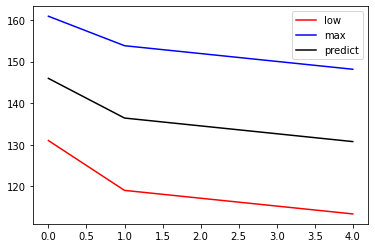

In [41]:
# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')
# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')
# 실제 가격 그래프
plt.plot(predict_y ,color='black')
plt.legend(['low', 'max','predict'])